## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
del gdp_df['Value Footnotes']

In [12]:
gdp_df.rename(columns = {'Country or Area' : 'Country','Value' : 'GDP_Per_Capita'})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [15]:
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

In [16]:
gdp_df['Country or Area'].nunique()

247

In [17]:
gdp_df['Year'].nunique()

34

In [18]:
# 233 countries have data for all years

In [19]:
# Countries missing many years of data
gdp_df['Country or Area'].value_counts()

Country or Area
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [20]:
# only 2013-2021 have data for all countries

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

<Axes: xlabel='Year', ylabel='Value'>

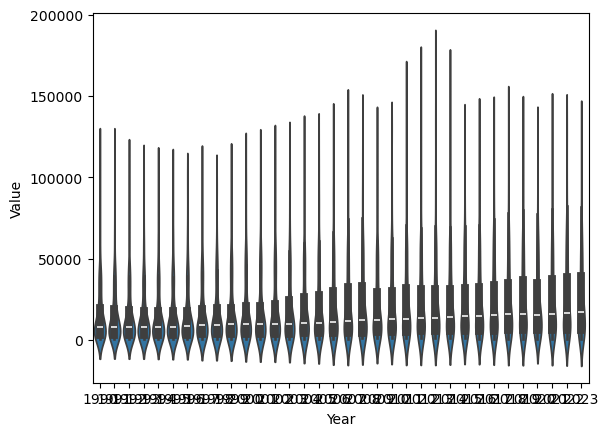

In [22]:
sns.violinplot(x = gdp_df['Year'],y = gdp_df['Value'])

interactive(children=(Dropdown(description='Year', options=('Year', 'Country or Area', 'Value'), value='Year')…

<function __main__.histogram(Year)>

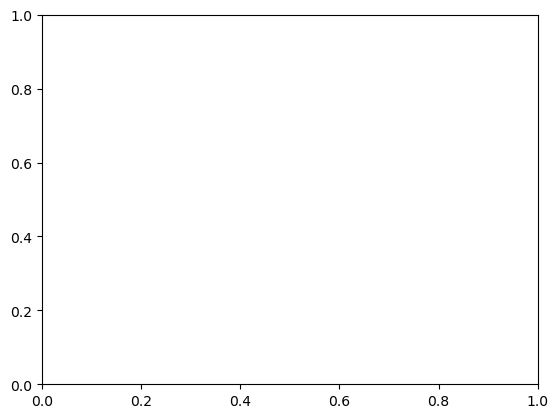

In [23]:
#Tried a mathplotlib and no bueno
columns = ["Year", "Country or Area", "Value"]

def histogram(Year):
    fig, ax = plt.subplots()
    ax.hist(gpd_df, x = Year, color = "Value")
    plt.show()

interact(histogram, Year=columns)


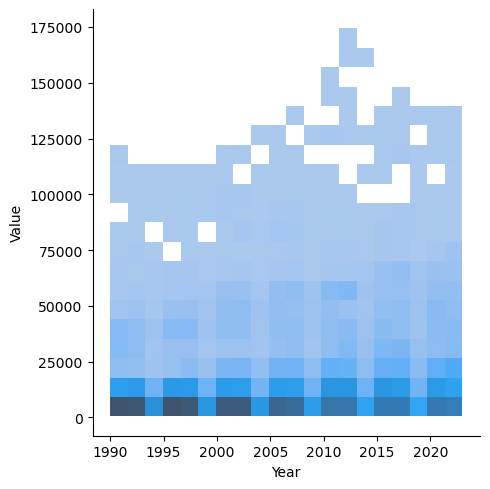

In [24]:
sns.displot(x = gdp_df['Year'],y = gdp_df['Value'], bins = 20)

<Axes: xlabel='Year', ylabel='Density'>

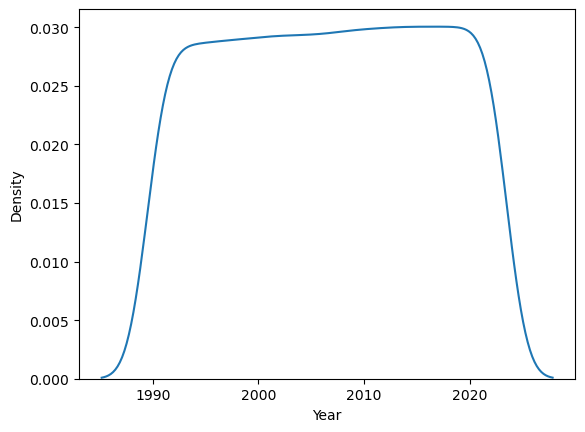

In [25]:
sns.kdeplot(gdp_df["Year"])

<Axes: xlabel='Year', ylabel='Value'>

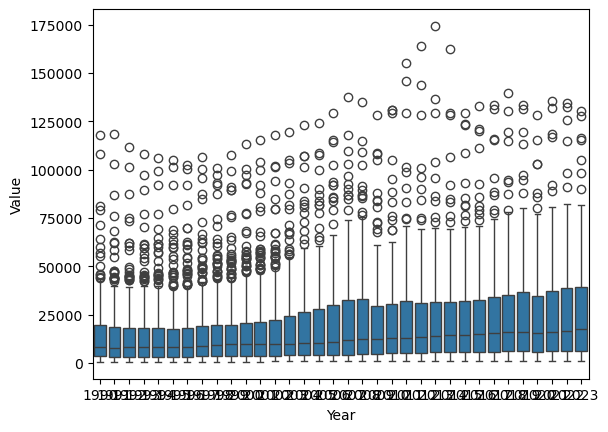

In [26]:
sns.boxplot(x=gdp_df['Year'], y=gdp_df['Value'])

9. What was the median GDP per capita value in 2020?

In [28]:
gdp_df.groupby('Year')['Value'].median()

Year
1990     8243.732655
1991     7892.844113
1992     8069.014443
1993     8241.548300
1994     8058.611401
1995     8160.313528
1996     8446.316579
1997     8979.649300
1998     9360.690499
1999     9544.937217
2000     9576.509216
2001     9661.779060
2002     9757.546918
2003     9827.990797
2004    10277.999952
2005    10527.474837
2006    11075.353901
2007    11754.139024
2008    12307.859128
2009    12550.273271
2010    13032.493476
2011    13095.946470
2012    13377.398815
2013    13804.791297
2014    14247.101002
2015    14545.381145
2016    15016.092064
2017    15424.055430
2018    15963.622908
2019    16215.360797
2020    15309.235988
2021    15900.976581
2022    16676.092080
2023    17458.086205
Name: Value, dtype: float64

In [29]:
# the GDP per capital in 2020 is 15,309.235988

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [31]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades.head()

,Country or Area,Year,Value
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


<Axes: xlabel='Year', ylabel='Value'>

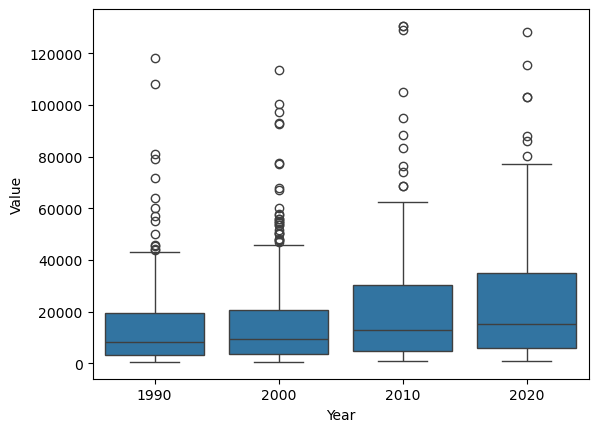

In [32]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['Value'])

<Axes: xlabel='Year', ylabel='Value'>

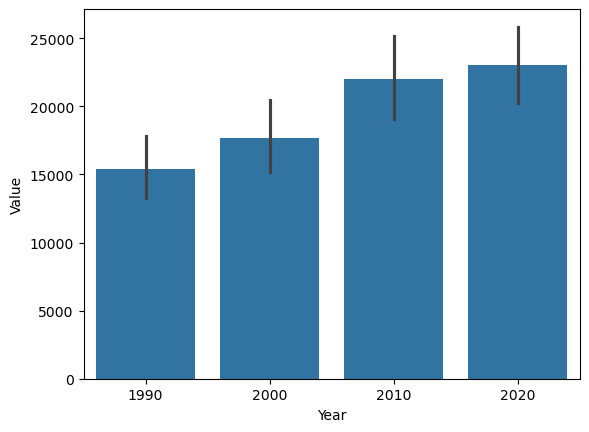

In [33]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['Value'])

<Axes: xlabel='Year', ylabel='Value'>

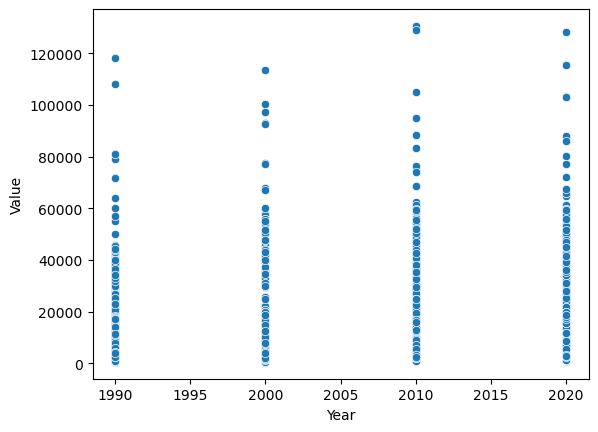

In [34]:
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['Value'])

<Axes: xlabel='Year', ylabel='Value'>

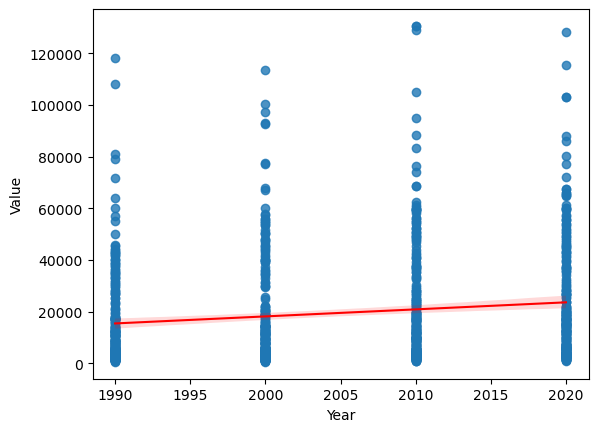

In [35]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['Value'], line_kws={"color":"red", "linewidth":1.5})

11. Which country was the first to have a GDP per capita greater than $100,000?

In [37]:
first_gdp = gdp_df[gdp_df["Value"] > 100000]
first_gdp.head()

,Country or Area,Year,Value
750,Bermuda,2011,101174.504104
751,Bermuda,2010,105121.639689
752,Bermuda,2009,108091.644563
753,Bermuda,2008,115015.749469
754,Bermuda,2007,117742.118950


In [38]:
first_gdp = gdp_df[gdp_df['Value'] > 100000].sort_values(by='Year')
print(first_gdp)


           Country or Area  Year          Value
7827  United Arab Emirates  1990  108057.042464
974                 Brunei  1990  118163.683198
7826  United Arab Emirates  1991  103098.537132
973                 Brunei  1991  118220.683619
7825  United Arab Emirates  1992  101100.487512
...                    ...   ...            ...
6116                 Qatar  2023  116159.142559
4457      Macao SAR, China  2023  104961.643485
6511             Singapore  2023  127543.554752
4423            Luxembourg  2023  130373.477942
3490               Ireland  2023  115401.125283

[106 rows x 3 columns]


In [39]:
#United Arab Emirates and Brunei were the first to have GDP over 100,000 

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [41]:
country2020_highest = gdp_df[gdp_df['Year'].isin([2020])].sort_values(by = 'Value', ascending = False)
print(country2020_highest)

               Country or Area  Year          Value
4426                Luxembourg  2020  128256.560341
6514                 Singapore  2020  115304.149459
6119                     Qatar  2020  103061.913414
3493                   Ireland  2020  102989.787335
741                    Bermuda  2020   87894.401174
...                        ...   ...            ...
5133                Mozambique  2020    1466.124765
6699                   Somalia  2020    1396.053436
1734           Dem. Rep. Congo  2020    1277.632863
1302  Central African Republic  2020    1136.570530
1046                   Burundi  2020     833.920257

[247 rows x 3 columns]


In [42]:
# luxembourg had the highest gdp in 2020

In [43]:
luxembourg_gdp = gdp_df[gdp_df['Country or Area'].isin(['Luxembourg'])]
print(luxembourg_gdp)

     Country or Area  Year          Value
4423      Luxembourg  2023  130373.477942
4424      Luxembourg  2022  134507.667531
4425      Luxembourg  2021  135379.291201
4426      Luxembourg  2020  128256.560341
4427      Luxembourg  2019  131609.099616
4428      Luxembourg  2018  130415.193065
4429      Luxembourg  2017  131353.485059
4430      Luxembourg  2016  132836.085831
4431      Luxembourg  2015  129293.707435
4432      Luxembourg  2014  129443.183641
4433      Luxembourg  2013  129142.843309
4434      Luxembourg  2012  128099.279571
4435      Luxembourg  2011  129083.129771
4436      Luxembourg  2010  130620.266278
4437      Luxembourg  2009  128205.455863
4438      Luxembourg  2008  134973.375929
4439      Luxembourg  2007  137821.419596
4440      Luxembourg  2006  129480.260595
4441      Luxembourg  2005  124095.617345
4442      Luxembourg  2004  122956.102288
4443      Luxembourg  2003  119652.627050
4444      Luxembourg  2002  118024.021417
4445      Luxembourg  2001  115540

<Axes: xlabel='Year', ylabel='Value'>

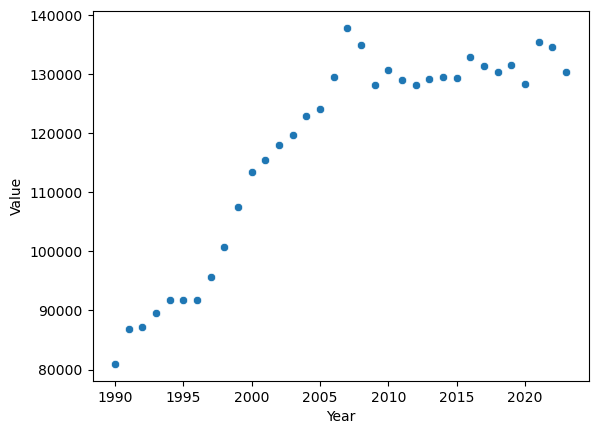

In [44]:
sns.scatterplot(x=luxembourg_gdp['Year'], y= luxembourg_gdp['Value'])


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 


In [46]:
country2020_lowest = gdp_df[gdp_df['Year'].isin([2020])].sort_values(by='Value', ascending = True) 
print(country2020_lowest)

               Country or Area  Year          Value
1046                   Burundi  2020     833.920257
1302  Central African Republic  2020    1136.570530
1734           Dem. Rep. Congo  2020    1277.632863
6699                   Somalia  2020    1396.053436
5133                Mozambique  2020    1466.124765
...                        ...   ...            ...
741                    Bermuda  2020   87894.401174
3493                   Ireland  2020  102989.787335
6119                     Qatar  2020  103061.913414
6514                 Singapore  2020  115304.149459
4426                Luxembourg  2020  128256.560341

[247 rows x 3 columns]


In [47]:
Burundi_gdp = gdp_df[gdp_df['Country or Area'].isin(['Burundi'])]
print(Burundi_gdp)

     Country or Area  Year        Value
1043         Burundi  2023   828.861074
1044         Burundi  2022   829.387160
1045         Burundi  2021   836.665571
1046         Burundi  2020   833.920257
1047         Burundi  2019   855.732720
1048         Burundi  2018   868.555508
1049         Burundi  2017   880.993440
1050         Burundi  2016   897.459046
1051         Burundi  2015   918.557193
1052         Burundi  2014   977.765840
1053         Burundi  2013   970.375392
1054         Burundi  2012   958.657403
1055         Burundi  2011   951.188460
1056         Burundi  2010   947.621417
1057         Burundi  2009   944.629926
1058         Burundi  2008   957.222664
1059         Burundi  2007   951.290083
1060         Burundi  2006   954.190854
1061         Burundi  2005   938.381597
1062         Burundi  2004   965.204118
1063         Burundi  2003   955.669204
1064         Burundi  2002   998.561289
1065         Burundi  2001   983.396847
1066         Burundi  2000   988.036863


<Axes: xlabel='Year', ylabel='Value'>

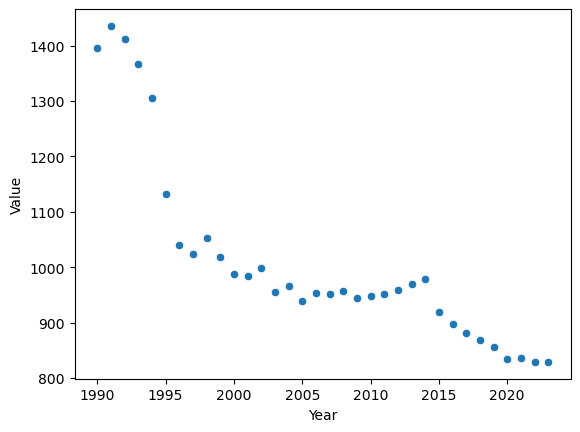

In [48]:
sns.scatterplot(x=Burundi_gdp['Year'], y=Burundi_gdp['Value'])

Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [50]:
country1990_gdp = gdp_df[gdp_df['Year'].isin([1990])].sort_values(by='Value', ascending = False)
print(country1990_gdp)

           Country or Area  Year          Value
974                 Brunei  1990  118163.683198
7827  United Arab Emirates  1990  108057.042464
4456            Luxembourg  1990   80947.492013
771                Bermuda  1990   79109.890650
6149                 Qatar  1990   71584.446629
...                    ...   ...            ...
7759                Uganda  1990    1080.038310
4558                Malawi  1990    1047.464364
2251              Ethiopia  1990     874.346891
5197               Myanmar  1990     775.328254
5163            Mozambique  1990     547.622781

[233 rows x 3 columns]


In [51]:
country2020_gdp = gdp_df[gdp_df['Year'].isin([2020])].sort_values(by='Value', ascending = False)
print(country2020_gdp)

               Country or Area  Year          Value
4426                Luxembourg  2020  128256.560341
6514                 Singapore  2020  115304.149459
6119                     Qatar  2020  103061.913414
3493                   Ireland  2020  102989.787335
741                    Bermuda  2020   87894.401174
...                        ...   ...            ...
5133                Mozambique  2020    1466.124765
6699                   Somalia  2020    1396.053436
1734           Dem. Rep. Congo  2020    1277.632863
1302  Central African Republic  2020    1136.570530
1046                   Burundi  2020     833.920257

[247 rows x 3 columns]


In [52]:
merge_gdp = pd.merge(country1990_gdp, country2020_gdp, on = 'Country or Area').sort_values(by = 'Value_y', ascending = False) 
print(merge_gdp)

              Country or Area  Year_x       Value_x  Year_y        Value_y
2                  Luxembourg    1990  80947.492013    2020  128256.560341
11                  Singapore    1990  45371.006902    2020  115304.149459
4                       Qatar    1990  71584.446629    2020  103061.913414
43                    Ireland    1990  29567.221992    2020  102989.787335
3                     Bermuda    1990  79109.890650    2020   87894.401174
..                        ...     ...           ...     ...            ...
213                   Liberia    1990   1866.405481    2020    1497.376924
232                Mozambique    1990    547.622781    2020    1466.124765
202           Dem. Rep. Congo    1990   2172.001597    2020    1277.632863
219  Central African Republic    1990   1481.252551    2020    1136.570530
223                   Burundi    1990   1396.077627    2020     833.920257

[233 rows x 5 columns]


In [53]:
#yes, in general countries did have a higher GDP in 2020

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [55]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6084)

In [56]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [57]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6084 non-null   object 
 1   Year             6084 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 190.3+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [103]:
del internet_df ['Value Footnotes']

In [107]:
internet_df.rename(columns = {'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


16. Look at the number of observations in this dataset per year. What do you notice?

In [112]:
internet_df['Year'].value_counts()

Year
1990        226
2007        217
2011        214
2008        214
2009        214
2002        214
2006        212
2001        212
2005        212
2004        210
2000        210
2010        209
2012        209
2003        208
1999        207
2016        206
2017        205
2014        204
2015        203
2013        203
1998        195
1997        188
2021        186
2020        186
2019        185
2022        184
1996        177
2018        174
1995        141
1994         92
1993         66
1992         50
1991         39
2023         11
Footnote      1
Name: count, dtype: int64

In [114]:
# 1991 through 1994 and 2023 there is a signifcant decrease in observations

17. What is the first year to have a non-zero internet users percentage value?

In [137]:
non_zero = internet_df[internet_df['Value'] != 0].sort_values('Year')
print(non_zero)

                   Country or Area      Year      Value
3980  Netherlands (Kingdom of the)      1990   0.334387
543                        Belgium      1990   0.001007
306                      Australia      1990   0.585095
5332                   Switzerland      1990   0.595714
1010                        Canada      1990   0.361000
...                            ...       ...        ...
1656                       Ecuador      2023  72.694300
427                     Bangladesh      2023  44.502700
3057                        Kuwait      2023  99.747300
3323                    Luxembourg      2023  99.347900
6083                 footnoteSeqID  Footnote        NaN

[5804 rows x 3 columns]


In [139]:
# 1990 was the first year to have non-zero internet users percentage value.

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [156]:
distri_2000 = internet_df[internet_df['Year'].isin(['2000'])]
print(distri_2000)

          Country or Area  Year      Value
42                Albania  2000   0.114097
71                Algeria  2000   0.491706
100               Andorra  2000  10.538800
128                Angola  2000   0.105046
150              Anguilla  2000  22.405400
...                   ...   ...        ...
5974  Virgin Islands (US)  2000  13.815100
5994    Wallis and Futuna  2000   4.768070
6017                Yemen  2000   0.082500
6045               Zambia  2000   0.191072
6075             Zimbabwe  2000   0.401434

[210 rows x 3 columns]


<Axes: xlabel='Value', ylabel='Density'>

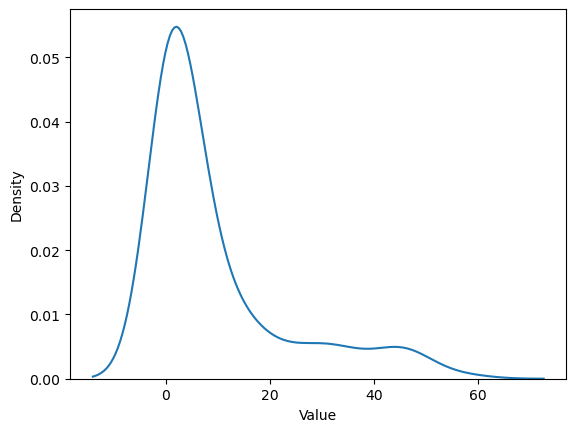

In [158]:
sns.kdeplot(distri_2000['Value'])

In [160]:
distri_2014 = internet_df[internet_df['Year'].isin(['2014'])]
print(distri_2014)

          Country or Area  Year    Value
5             Afghanistan  2014   7.0000
28                Albania  2014  54.3000
57                Algeria  2014  29.5000
87                Andorra  2014  86.1000
114                Angola  2014  21.3623
...                   ...   ...      ...
5937             Viet Nam  2014  41.0000
5960  Virgin Islands (US)  2014  50.0700
6003                Yemen  2014  22.5500
6031               Zambia  2014   6.5000
6061             Zimbabwe  2014  16.3647

[204 rows x 3 columns]


<Axes: xlabel='Value', ylabel='Density'>

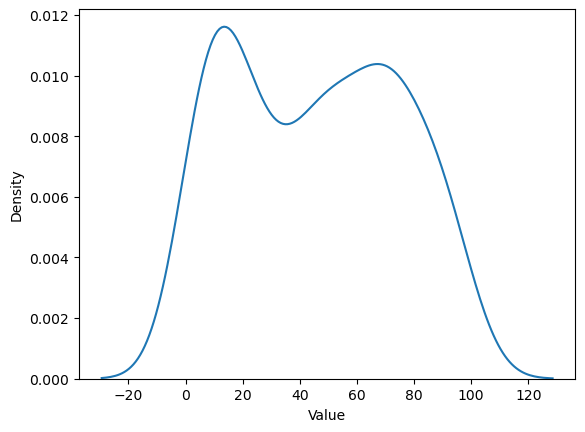

In [162]:
sns.kdeplot(distri_2014['Value'])